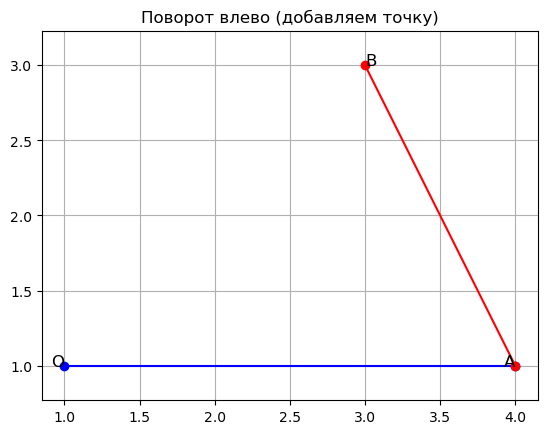

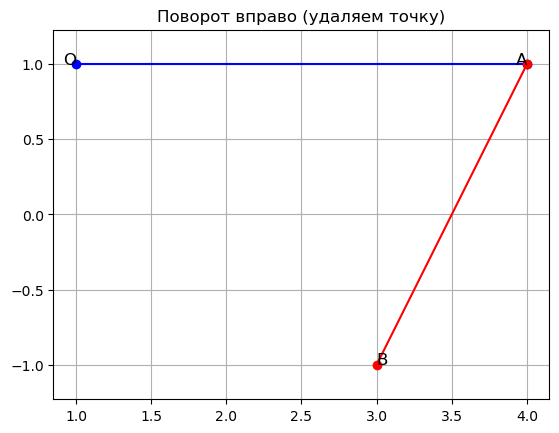

In [14]:
import matplotlib.pyplot as plt

# Три точки
O = (1, 1)
A = (4, 1)
B_left = (3, 3)    # поворот влево
B_right = (3, -1)  # поворот вправо

def draw_turn(o, a, b, title):
    plt.figure()
    plt.plot([o[0], a[0]], [o[1], a[1]], 'bo-')
    plt.plot([a[0], b[0]], [a[1], b[1]], 'ro-')
    
    plt.text(o[0], o[1], 'O', fontsize=12, ha='right')
    plt.text(a[0], a[1], 'A', fontsize=12, ha='right')
    plt.text(b[0], b[1], 'B', fontsize=12, ha='left')
    
    plt.title(title)
    plt.grid()
    plt.axis('equal')
    plt.show()

draw_turn(O, A, B_left, "Поворот влево (добавляем точку)")
draw_turn(O, A, B_right, "Поворот вправо (удаляем точку)")

In [1]:
class ConvexHull:
    def __init__(self, points):
        self.points = points

    def find_starting_point(self):
        return min(self.points, key=lambda p: (p[1], p[0]))

    def polar_angle(self, p0, p1):
        import math
        return math.atan2(p1[1] - p0[1], p1[0] - p0[0])

    def distance(self, p0, p1):
        return (p1[0] - p0[0])**2 + (p1[1] - p0[1])**2

    def cross_product(self, o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    def build_hull(self):
        if len(self.points) <= 1:
            return self.points

        start = self.find_starting_point()
        sorted_points = sorted(
            self.points,
            key=lambda p: (self.polar_angle(start, p), self.distance(start, p))
        )

        hull = [start]
        for pt in sorted_points:
            while len(hull) >= 2 and self.cross_product(hull[-2], hull[-1], pt) <= 0:
                hull.pop()
            hull.append(pt)

        return hull

In [3]:
if __name__ == "__main__":
    points = [(1, 1), (2, 5), (3, 3), (5, 3), (3, 2), (2, 2), (4, 4)]
    algo = ConvexHull(points)
    hull = algo.build_hull()
    print("Выпуклая оболочка:", hull)

Выпуклая оболочка: [(1, 1), (5, 3), (4, 4), (2, 5)]


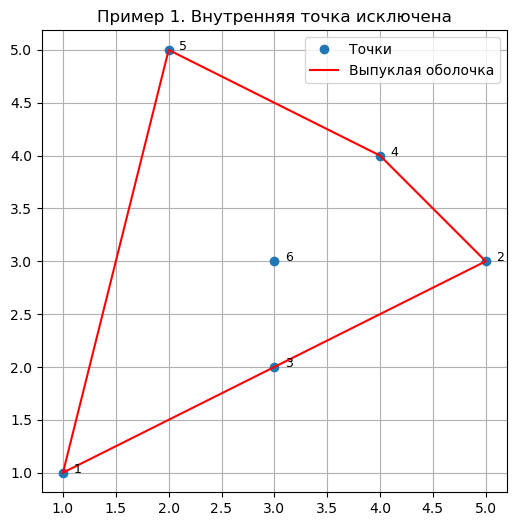

In [9]:
import matplotlib.pyplot as plt

points = [(1, 1), (5, 3), (3, 2), (4, 4), (2, 5), (3, 3)]  # внутренняя точка (3,3)
algo = ConvexHull(points)
hull = algo.build_hull()

# Распаковка
x_all, y_all = zip(*points)
x_hull, y_hull = zip(*hull + [hull[0]])  # замыкаем контур

# Построение
plt.figure(figsize=(6, 6))
plt.plot(x_all, y_all, 'o', label='Точки')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.1, y, str(i+1), fontsize=9)

plt.plot(x_hull, y_hull, 'r-', label='Выпуклая оболочка')
plt.title("Пример 1. Внутренняя точка исключена")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

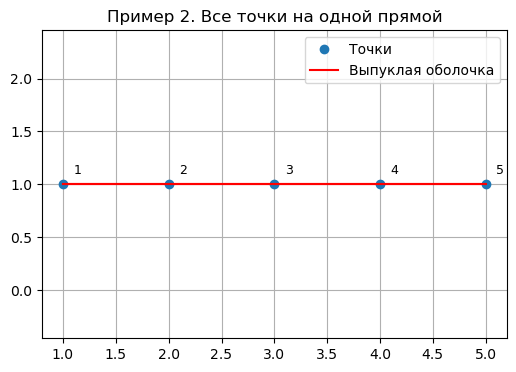

In [11]:
import matplotlib.pyplot as plt

# Все точки на одной прямой (по оси X)
points = [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
algo = ConvexHull(points)
hull = algo.build_hull()

# Подготовка для отрисовки
x_all, y_all = zip(*points)
x_hull, y_hull = zip(*hull + [hull[0]])

plt.figure(figsize=(6, 4))
plt.plot(x_all, y_all, 'o', label='Точки')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.1, y + 0.1, str(i+1), fontsize=9)

plt.plot(x_hull, y_hull, 'r-', label='Выпуклая оболочка')
plt.title("Пример 2. Все точки на одной прямой")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

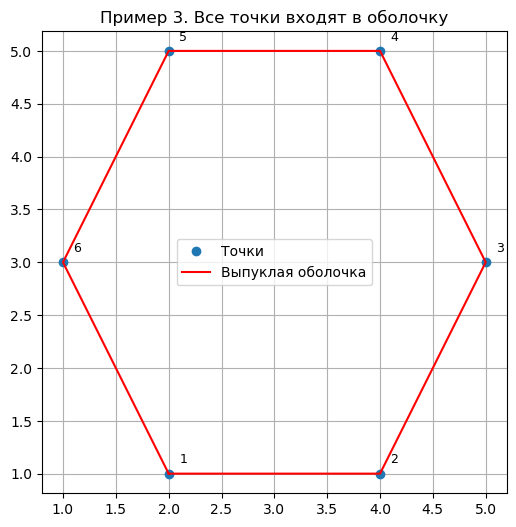

In [16]:
import matplotlib.pyplot as plt

# Пример выпуклого шестиугольника
points = [(2, 1), (4, 1), (5, 3), (4, 5), (2, 5), (1, 3)]
algo = ConvexHull(points)
hull = algo.build_hull()

# Подготовка координат
x_all, y_all = zip(*points)
x_hull, y_hull = zip(*hull + [hull[0]])

# Отрисовка
plt.figure(figsize=(6, 6))
plt.plot(x_all, y_all, 'o', label='Точки')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.1, y + 0.1, str(i + 1), fontsize=9)

plt.plot(x_hull, y_hull, 'r-', label='Выпуклая оболочка')
plt.title("Пример 3. Все точки входят в оболочку")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()